In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('subscribers.csv')
df.head(3)

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True


In [4]:
df.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0                        int64
subid                             int64
package_type                     object
num_weekly_services_utilized    float64
preferred_genre                  object
intended_use                     object
weekly_consumption_hour         float64
num_ideal_streaming_services    float64
age                             float64
male_TF                          object
country                          object
attribution_technical            object
attribution_survey               object
op_sys                           object
months_per_bill_period            int64
plan_type                        object
monthly_price                   float64
discount_price                  float64
account_creation_date            object
trial_end_date                   object
initial_credit_card_declined       bool
join_fee                        float64
language                         object
payment_type                     object
num_trial_days                    int64


In [6]:
df.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,227628.000000,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,341129.200041,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,197094.201084,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,170766.250000,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,340985.500000,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511844.000000,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [304]:
df.shape

(227628, 31)

### correlation matrix

encode categorical data to numerical

In [7]:
corr_df = df.drop(columns=['Unnamed: 0', 'subid', 
                           'account_creation_date', 'trial_end_date', 
                           'last_payment', 'next_payment', 'cancel_date'])

In [8]:
corr_df = pd.get_dummies(corr_df)
corr_df.columns

Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'months_per_bill_period',
       'monthly_price', 'discount_price', 'initial_credit_card_declined',
       'join_fee', 'num_trial_days', 'current_sub_TF', 'payment_period',
       'trial_completed', 'package_type_base', 'package_type_economy',
       'package_type_enhanced', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_False', 'male_TF_True', 'country_UAE',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_org

In [9]:
corr_df['current_sub_TF_True'] = df['current_sub_TF'].map(lambda x: 1 if x==True else 0)
corr_df['current_sub_TF_False'] = df['current_sub_TF'].map(lambda x: 1 if x==False else 0)

In [10]:
full_corr_matrix = corr_df.corr()[corr_df.columns]

In [11]:
#f, ax = plt.subplots(figsize=(30, 30))

#heatmap = sns.heatmap(full_corr_matrix,
 #                     square = True,
 #                    linewidths = .5,
 #                     cmap = 'coolwarm',
 #                     cbar_kws = {'shrink': .4,
 #                                 'ticks' : [-1, -.5, 0, 0.5, 1]},
 #                     vmin = -1,
 #                     vmax = 1,
 #                     annot = True,
 #                     annot_kws = {'size': 3})

# add the column names as labels
#ax.set_yticklabels(corr_df.columns, rotation = 0)
#ax.set_xticklabels(corr_df.columns)
#sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
#sns.set(font_scale=1)
#plt.show()
#plt.savefig('full_corr_matrix.png')

In [12]:
corr_target = corr_df.corr()[['current_sub_TF_True']].sort_values('current_sub_TF_True', ascending=False)

In [13]:
salient_num_features1 = corr_target.loc[corr_target['current_sub_TF_True'] > 0.2, :]
salient_num_features1

,current_sub_TF_True
current_sub_TF,1.000000
current_sub_TF_True,1.000000
payment_period,0.747255
trial_completed,0.403306
intended_use_access to exclusive content,0.384959
preferred_genre_comedy,0.382847
num_weekly_services_utilized,0.292874
attribution_survey_referral,0.224132


In [14]:
salient_num_features2 = corr_target.loc[corr_target['current_sub_TF_True'] < -0.2, :]
salient_num_features2

,current_sub_TF_True
intended_use_expand international access,-0.215984
intended_use_expand regional access,-0.219726
intended_use_replace OTT,-0.236754
current_sub_TF_False,-1.000000


In [15]:
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, X_train, y_train).mean(),4)}.')
    print(f'The training score for this model is {round(model.score(X_train, y_train), 4)}.')
    print(f'The testing score for this model is {round(model.score(X_test, y_test),4)}.')

In [16]:
# y = corr_df['monthly_price']
y = corr_df['current_sub_TF_True']

In [17]:
# full
X = corr_df[['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'months_per_bill_period',
       'monthly_price', 'discount_price', 'initial_credit_card_declined',
       'join_fee', 'num_trial_days', 'current_sub_TF', 'payment_period',
       'trial_completed', 'package_type_base', 'package_type_economy',
       'package_type_enhanced', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_False', 'male_TF_True', 'country_UAE',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bing',
       'attribution_technical_brand sem intent google',
       'attribution_technical_content_greatist',
       'attribution_technical_criteo', 'attribution_technical_direct_mail',
       'attribution_technical_discovery', 'attribution_technical_display',
       'attribution_technical_email', 'attribution_technical_email_blast',
       'attribution_technical_facebook',
       'attribution_technical_facebook_organic',
       'attribution_technical_google_organic',
       'attribution_technical_influencer', 'attribution_technical_internal',
       'attribution_technical_organic', 'attribution_technical_other',
       'attribution_technical_ott', 'attribution_technical_pinterest',
       'attribution_technical_pinterest_organic',
       'attribution_technical_playstore', 'attribution_technical_podcast',
       'attribution_technical_quora', 'attribution_technical_referral',
       'attribution_technical_samsung', 'attribution_technical_search',
       'attribution_technical_tv', 'attribution_technical_twitter',
       'attribution_technical_vod', 'attribution_technical_youtube',
       'attribution_survey_affiliate', 'attribution_survey_amfm_radio',
       'attribution_survey_direct_mail', 'attribution_survey_facebook',
       'attribution_survey_facebook_organic', 'attribution_survey_other',
       'attribution_survey_ott', 'attribution_survey_pinterest',
       'attribution_survey_podcast', 'attribution_survey_public_radio',
       'attribution_survey_referral', 'attribution_survey_search',
       'attribution_survey_sirius xm', 'attribution_survey_social_organic',
       'attribution_survey_tv', 'attribution_survey_youtube', 'op_sys_Android',
       'op_sys_iOS', 'plan_type_base_eur_14_day_trial',
       'plan_type_base_uae_14_day_trial',
       'plan_type_base_uae_no_trial_7_day_guarantee',
       'plan_type_high_aud_14_day_trial', 'plan_type_high_jpy_14_day_trial',
       'plan_type_high_sar_14_day_trial', 'plan_type_high_uae_14_day_trial',
       'plan_type_low_eur_no_trial', 'plan_type_low_gbp_14_day_trial',
       'plan_type_low_sar_no_trial', 'plan_type_low_uae_no_trial',
       'language_ar', 'payment_type_Apple Pay', 'payment_type_CBD',
       'payment_type_Najim', 'payment_type_Paypal', 'payment_type_RAKBANK',
       'payment_type_Standard Charter']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# corr > 0.2
X1 = corr_df[['payment_period', 'trial_completed', 
             'intended_use_access to exclusive content',
             'preferred_genre_comedy',
             #'num_weekly_services_utilized', # too many null
             'attribution_survey_referral']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.33, random_state=42)

In [19]:
X.isnull().sum()

num_weekly_services_utilized     110450
weekly_consumption_hour           37930
num_ideal_streaming_services     112170
age                               35169
months_per_bill_period                0
                                  ...  
payment_type_CBD                      0
payment_type_Najim                    0
payment_type_Paypal                   0
payment_type_RAKBANK                  0
payment_type_Standard Charter         0
Length: 100, dtype: int64

In [20]:
lr = LinearRegression()
#lr.fit(X_train, y_train)
#display_R2_scores(lr, X_train, y_train, X_test, y_test)

In [21]:
lr = LinearRegression()
lr.fit(X_train1, y_train1)
display_R2_scores(lr, X_train1, y_train1, X_test1, y_test1)

The mean cross validation score for this model is 0.6437.
The training score for this model is 0.6438.
The testing score for this model is 0.6435.


### package_type
customer internet package, independent from OTT signup

In [109]:
df['package_type'].value_counts()

base        111464
enhanced     63241
economy      17349
Name: package_type, dtype: int64

Text(0, 0.5, 'Counts')

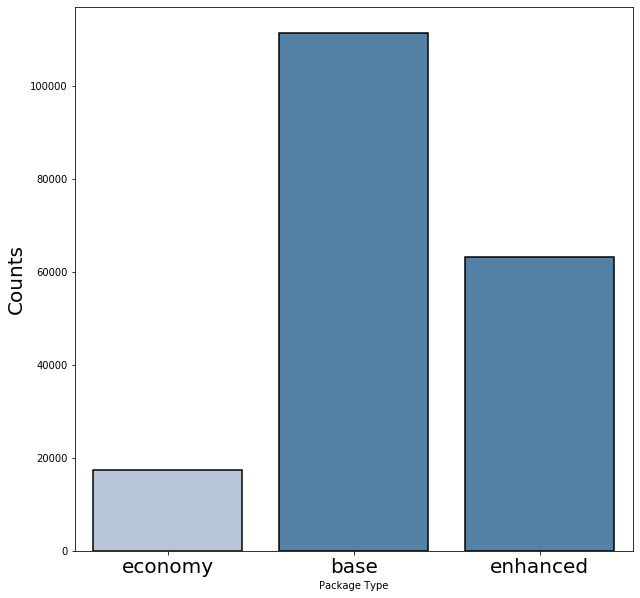

In [139]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x='package_type', data=df,
                   palette = ['lightsteelblue', 'steelblue', 'steelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Package Type')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('package_type.png')

Text(0, 0.5, 'Subscribed')

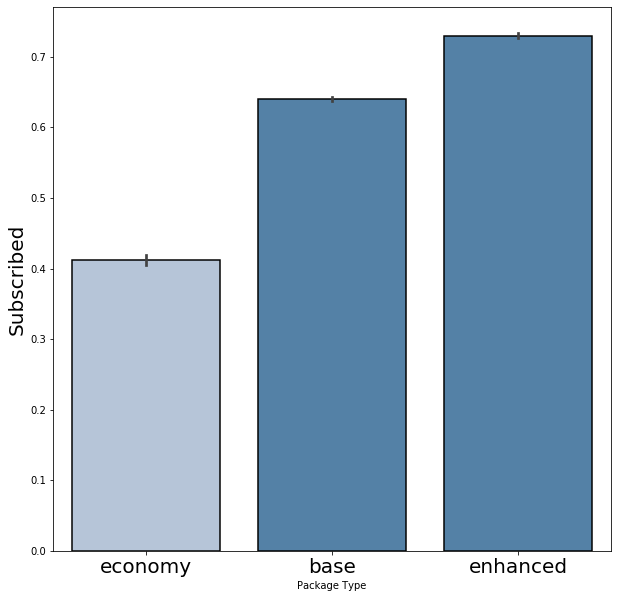

In [140]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'package_type', y = 'current_sub_TF', data = df,
                 palette = ['lightsteelblue', 'steelblue', 'steelblue'], 
                 linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Package Type')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('package_type.png')

`package_type` means "customer internet package, independent from OTT signup". This means that for example, I want to know whether it is worth-it to add HD films to the streaming service, I would realize maybe that is not necessary because most of my users only use base internet and HD would probably load slow etc.

### num_weekly_services_utilized
number of OTT services currently subscribed to, self-reported upon signup

In [141]:
#df['num_weekly_services_utilized'].value_counts()

In [142]:
#num_weekly_services_utilized_dict = dict(df['num_weekly_services_utilized'].value_counts())
#plt.bar(num_weekly_services_utilized_dict.keys(), num_weekly_services_utilized_dict.values())
#plt.show()

Text(0, 0.5, 'Counts')

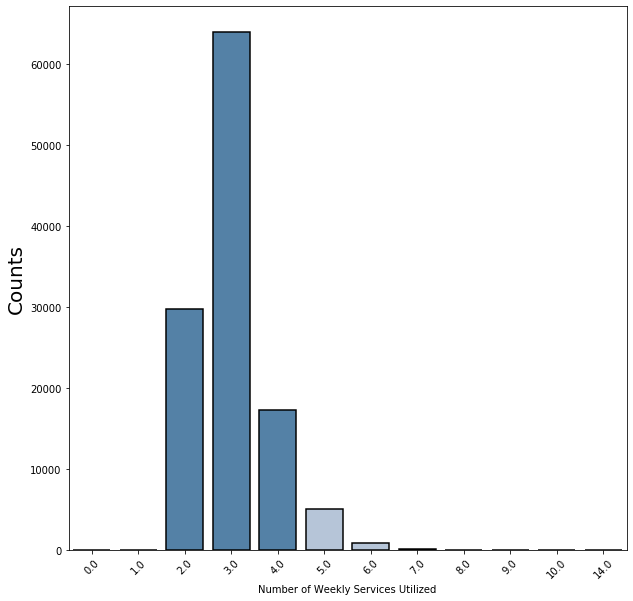

In [154]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x='num_weekly_services_utilized', data=df,
                   palette = ['lightsteelblue', 'lightsteelblue', 
                              'steelblue', 'steelblue',
                              'steelblue', 'lightsteelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=10, rotation=45)
#plt.yticks(fontsize=20)
plt.xlabel('Number of Weekly Services Utilized')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('num_weekly_services_utilized.png')

Text(0, 0.5, 'Subscribed')

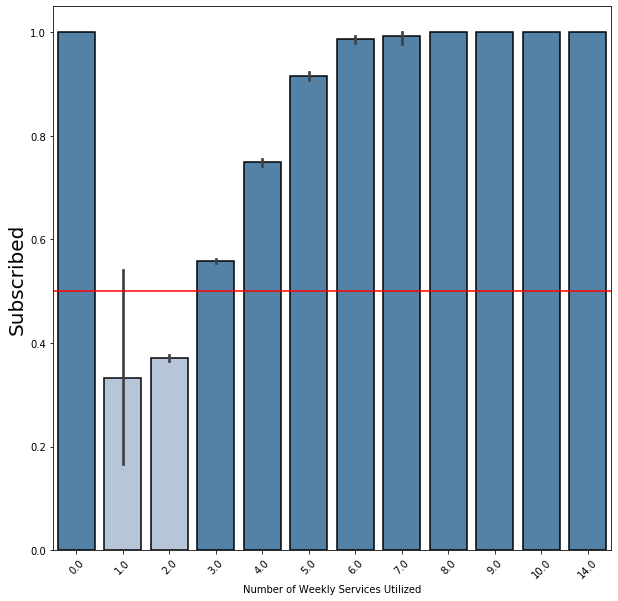

In [181]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'num_weekly_services_utilized', y = 'current_sub_TF', data = df,
                 palette = ['steelblue', 'lightsteelblue', 'lightsteelblue', 'steelblue', 
                            'steelblue', 'steelblue', 'steelblue', 'steelblue', 
                            'steelblue', 'steelblue', 'steelblue', 'steelblue'], 
                 linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=10, rotation=45)
#plt.yticks(fontsize=20)
plt.xlabel('Number of Weekly Services Utilized')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('package_type.png')

In [26]:
df.describe()['num_weekly_services_utilized']

count    117178.000000
mean          3.008824
std           0.820526
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          14.000000
Name: num_weekly_services_utilized, dtype: float64

In [163]:
#plt.figure(figsize = (10,10))
#sns.boxplot(list(df['num_weekly_services_utilized'].dropna()))

### preferred_genre
preferred content genre, self-reported upon signup

In [165]:
#df['preferred_genre'].value_counts()

In [166]:
#preferred_genre_dict = dict(df['preferred_genre'].value_counts())
#plt.bar(preferred_genre_dict.keys(), preferred_genre_dict.values())
#plt.show()

Text(0, 0.5, 'Counts')

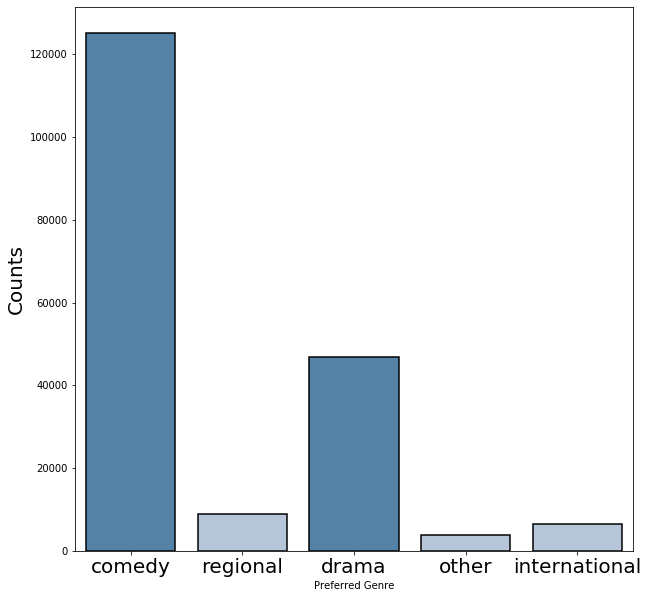

In [176]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x='preferred_genre', data=df,
                   palette = ['steelblue', 'lightsteelblue', 'steelblue',  'lightsteelblue', 'lightsteelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Preferred Genre')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('num_weekly_services_utilized.png')

Text(0, 0.5, 'Subscribed')

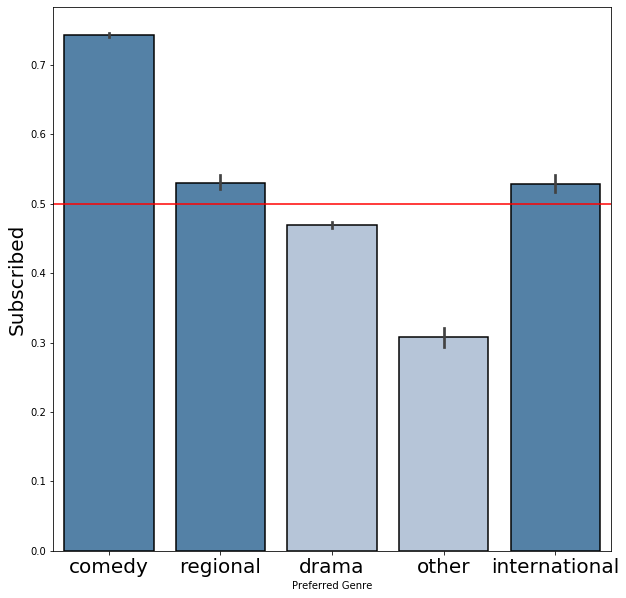

In [179]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'preferred_genre', y = 'current_sub_TF', data = df,
                 palette = ['steelblue', 'steelblue', 'lightsteelblue', 'lightsteelblue', 'steelblue'], 
                 linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Preferred Genre')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('preferred_genre.png')

### intended_use
intended OTT product usage, self-reported upon signup

In [182]:
#df['intended_use'].value_counts()

In [183]:
#intended_use_dict = dict(df['intended_use'].value_counts())
#plt.bar(intended_use_dict.keys(), intended_use_dict.values())
#plt.xticks(rotation=85)
#plt.show()

Text(0, 0.5, 'Counts')

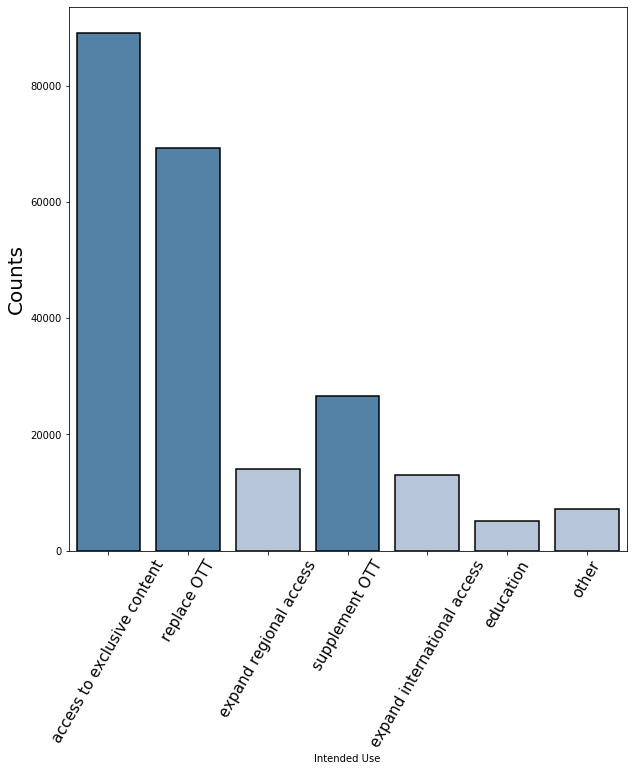

In [194]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x='intended_use', data=df,
                   palette = ['steelblue', 'steelblue', 'lightsteelblue',  'steelblue', 'lightsteelblue',
                              'lightsteelblue', 'lightsteelblue', 'lightsteelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=15, rotation=60)
#plt.yticks(fontsize=20)
plt.xlabel('Intended Use')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('num_weekly_services_utilized.png')

Text(0, 0.5, 'Subscribed')

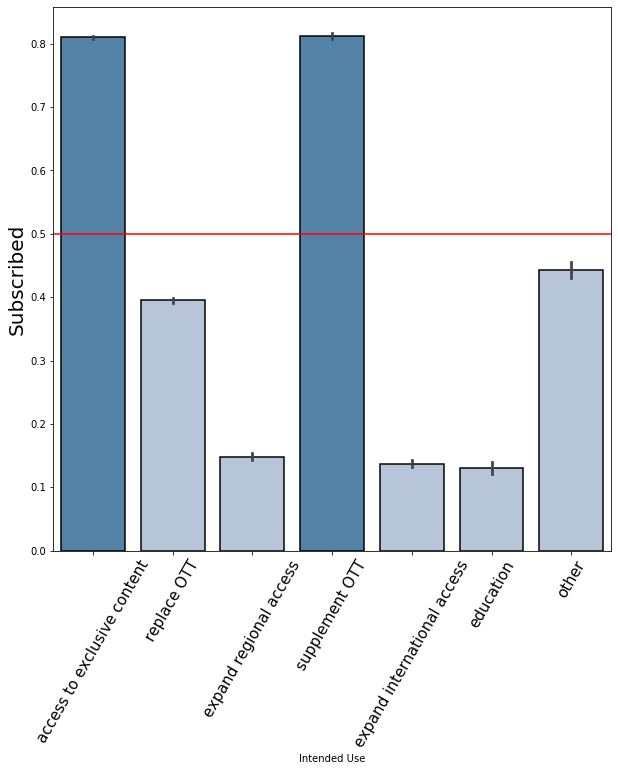

In [192]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'intended_use', y = 'current_sub_TF', data = df,
                 palette = ['steelblue', 'lightsteelblue', 'lightsteelblue', 'steelblue', 'lightsteelblue',
                           'lightsteelblue', 'lightsteelblue', 'lightsteelblue'], 
                 linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=15, rotation=60)
#plt.yticks(fontsize=20)
plt.xlabel('Intended Use')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('preferred_genre.png')

### weekly_consumption_hour
number of television or movies consumed per week, self-reported upon signup

In [201]:
#df['weekly_consumption_hour'].value_counts()

In [196]:
#weekly_consumption_hour_dict = dict(df['weekly_consumption_hour'].value_counts())
#plt.bar(weekly_consumption_hour_dict.keys(), weekly_consumption_hour_dict.values())

In [197]:
#df.describe()['weekly_consumption_hour']

In [198]:
#plt.boxplot(list(df['weekly_consumption_hour'].dropna()))
#plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


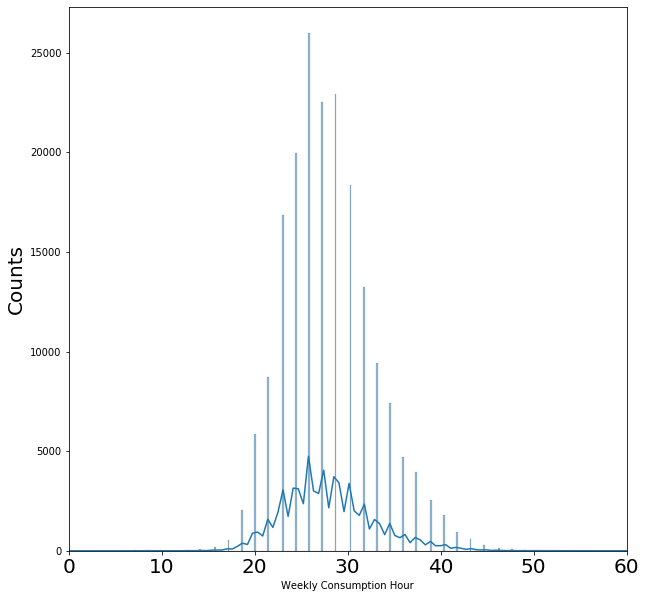

In [207]:
plt.figure(figsize=(10,10))
#plt.hist(df['Lng'])
sns.histplot(data=df, x='weekly_consumption_hour', kde=True)
plt.xlabel('Weekly Consumption Hours')
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=20)
plt.xlim([0,60])
#plt.savefig('lng_hist.png')
plt.show()

(0, 60)

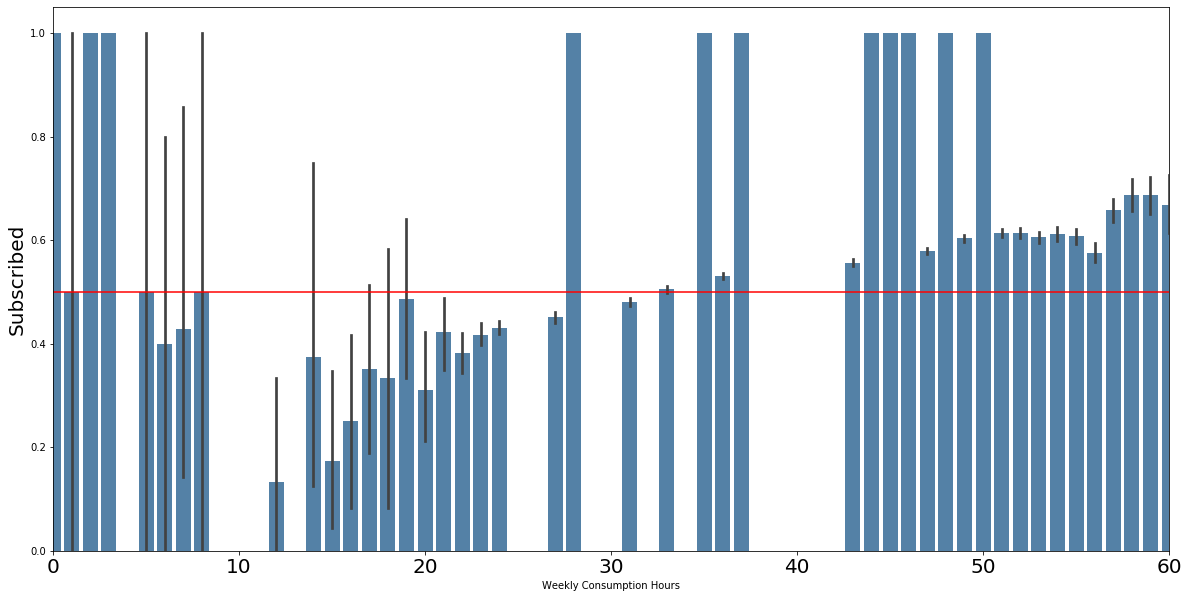

In [226]:
#custom_palette = {}
#for q in set(df.current_sub_TF):
#    avr = (np.average(df[df.current_sub_TF == q].current_sub_TF))
#    if avr < 0.5:
#        custom_palette[q] = 'lightsteelblue'
#    else:
#        custom_palette[q] = 'steelblue'


plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'weekly_consumption_hour', y = 'current_sub_TF', data = df,
                 palette = ['steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(np.arange(0,61,10), np.arange(0,61,10), fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Weekly Consumption Hours')
plt.ylabel('Subscribed', fontsize=20)
plt.xlim([0,60])
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('preferred_genre.png')

### num_ideal_streaming_services
subscriber's target number of services (Mevod,Starz,etc.) subscribed to, self-reported upon signup

In [227]:
#df['num_ideal_streaming_services'].value_counts()

In [228]:
#num_ideal_streaming_services_dict = dict(df['num_ideal_streaming_services'].value_counts())
#plt.bar(num_ideal_streaming_services_dict.keys(), num_ideal_streaming_services_dict.values())

In [229]:
#df.describe()['num_ideal_streaming_services']

In [230]:
#plt.boxplot(list(df['num_ideal_streaming_services'].dropna()))
#plt.show()

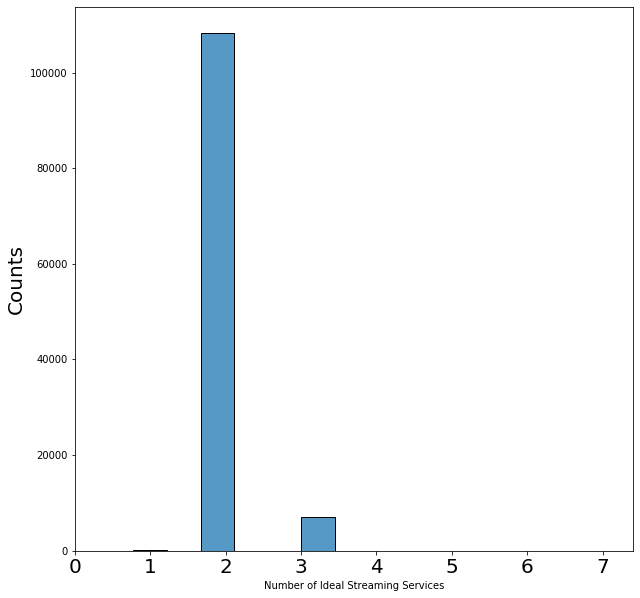

In [234]:
plt.figure(figsize=(10,10))
#plt.hist(df['num_ideal_streaming_services'])
sns.histplot(data=df, x='num_ideal_streaming_services', kde=False)
plt.xlabel('Number of Ideal Streaming Services')
plt.ylabel('Counts', fontsize=20)
plt.xlim(0)
plt.xticks(fontsize=20)
#plt.savefig('num_ideal_streaming_services.png')
plt.show()

(0, 7.5)

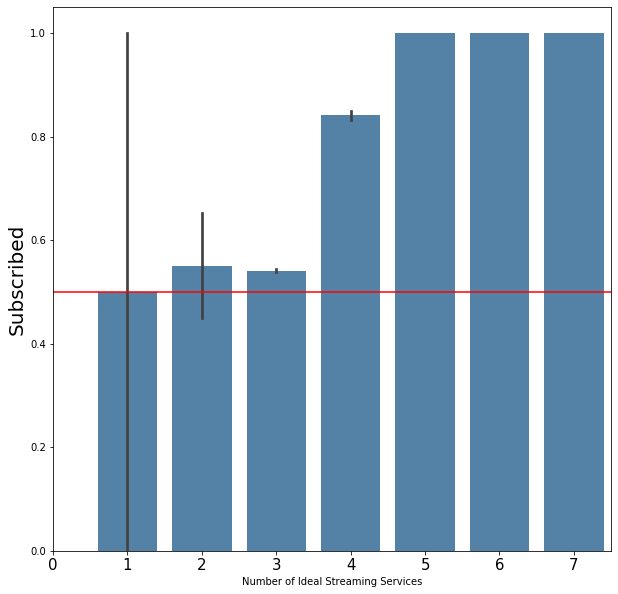

In [245]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'num_ideal_streaming_services', y = 'current_sub_TF', data = df,
                 palette = ['steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(np.arange(-1,8), np.arange(-1,8), fontsize=15)
#plt.yticks(fontsize=20)
plt.xlabel('Number of Ideal Streaming Services')
plt.ylabel('Subscribed', fontsize=20)
plt.xlim(0)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('preferred_genre.png')

### age
subscriber age

In [246]:
#df['age'].value_counts()

In [251]:
#age_dict = dict(df['age'].value_counts())
#plt.bar(age_dict.keys(), age_dict.values())
#plt.show()

We see that the x-axis is going to 1e7 which doesn't make sense. There is probably something wrong with the data.

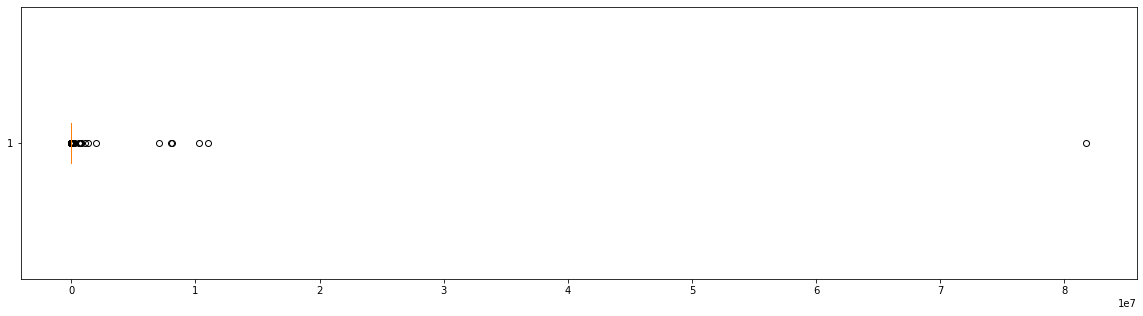

In [269]:
plt.figure(figsize=(20,5))
plt.boxplot(list(df['age'].dropna()), vert=False)
plt.show()

We can clearly see that there is an outlier at 1e7.

In [270]:
(df['age'].dropna()<100).value_counts()

True     191569
False       890
Name: age, dtype: int64

In [369]:
890/(890+191569)

0.004624361552330626

In [383]:
df['age'] = df['age']<100

If we drop the ages that are greater than 100, we are only dropping 0.4% of the data.

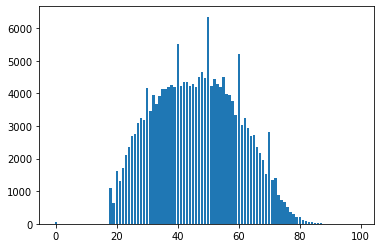

In [278]:
age_dict = dict(df[df['age']<100]['age'].value_counts())
plt.bar(age_dict.keys(), age_dict.values())
plt.show()

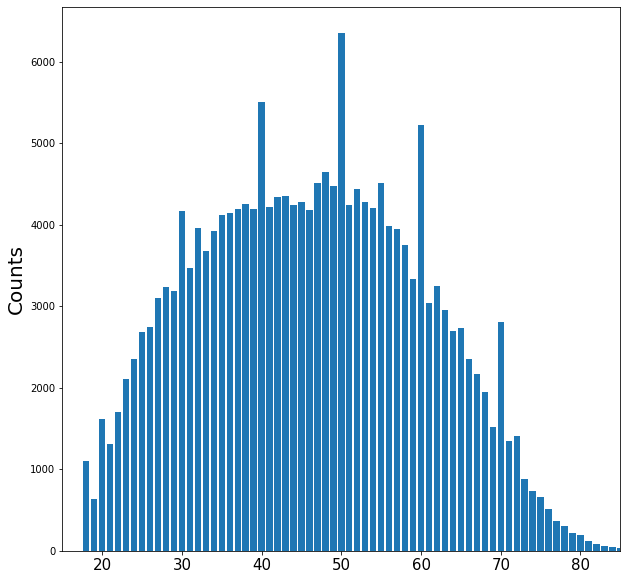

In [283]:
plt.figure(figsize=(10,10))
age_dict = dict(df[df['age']<100]['age'].value_counts())
plt.bar(age_dict.keys(), age_dict.values())
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.xlim(15, 85)
plt.show()

(15, 85)

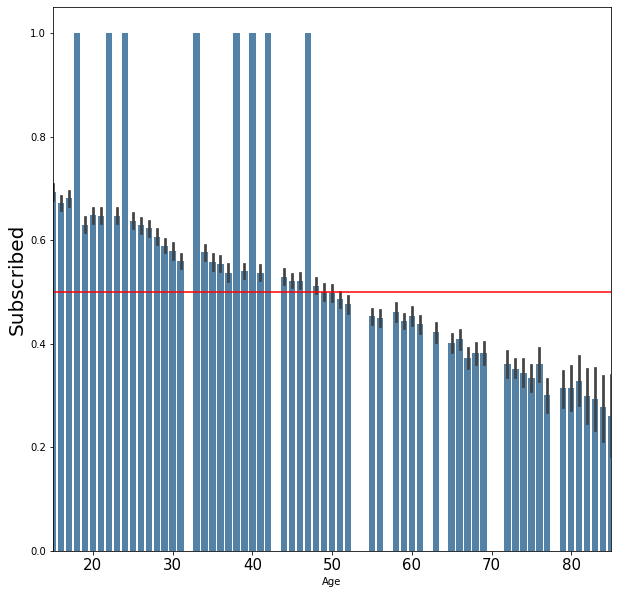

In [294]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'age', y = 'current_sub_TF', data = df,
                 palette = ['steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(np.arange(10,85,10), np.arange(10,85,10), fontsize=15)
#plt.yticks(fontsize=20)
plt.xlabel('Age')
plt.ylabel('Subscribed', fontsize=20)
plt.xlim(15,85)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('preferred_genre.png')

### male_TF
subscriber gender, True if male, False if female

In [297]:
#df['male_TF'].value_counts()

In [296]:
#male_TF_dict = dict(df['male_TF'].value_counts())
#plt.bar(['Female', 'Male'], male_TF_dict.values())
#plt.show()

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

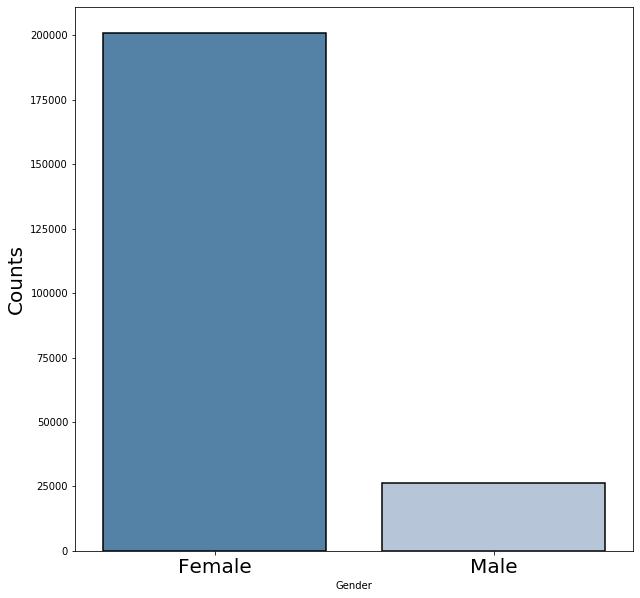

In [300]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x='male_TF', data=df,
                   palette = ['steelblue', 'lightsteelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Counts', fontsize=20)
ax.set_xticklabels(['Female', 'Male'])
#plt.savefig('num_weekly_services_utilized.png')

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

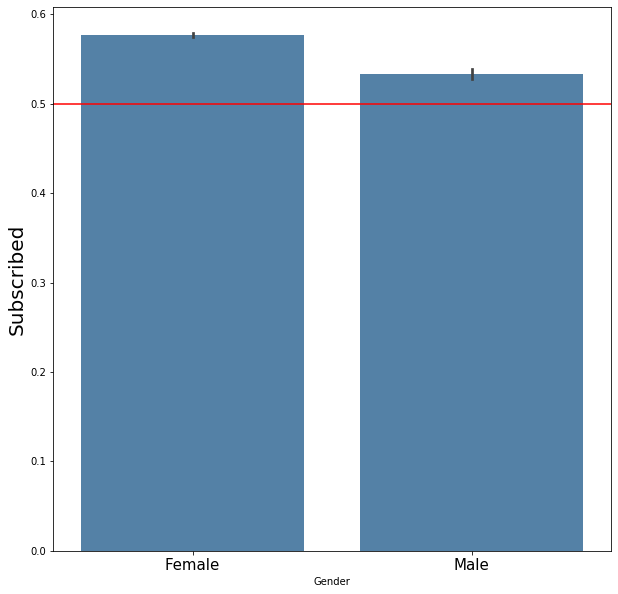

In [303]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'male_TF', y = 'current_sub_TF', data = df,
                 palette = ['steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=15)
#plt.yticks(fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Subscribed', fontsize=20)
ax.set_xticklabels(['Female', 'Male'])
#plt.savefig('preferred_genre.png')

### country
subscriber country

In [49]:
df['country'].value_counts()

UAE    227628
Name: country, dtype: int64

**All users are from UAE.**

### attribution_technical
entrance to sign-up form captured by product

In [305]:
#df['attribution_technical'].value_counts()

In [306]:
#attribution_technical_dict = dict(df['attribution_technical'].value_counts())
#plt.bar(attribution_technical_dict.keys(), attribution_technical_dict.values())
#plt.xticks(rotation=90)
#plt.show()

In [307]:
#attribution_technical_dict = dict(df['attribution_technical'].value_counts())
#plt.bar(attribution_technical_dict.keys(), np.log(list(attribution_technical_dict.values())))
#plt.xticks(rotation=90)
#plt.show()

Text(0, 0.5, 'Counts')

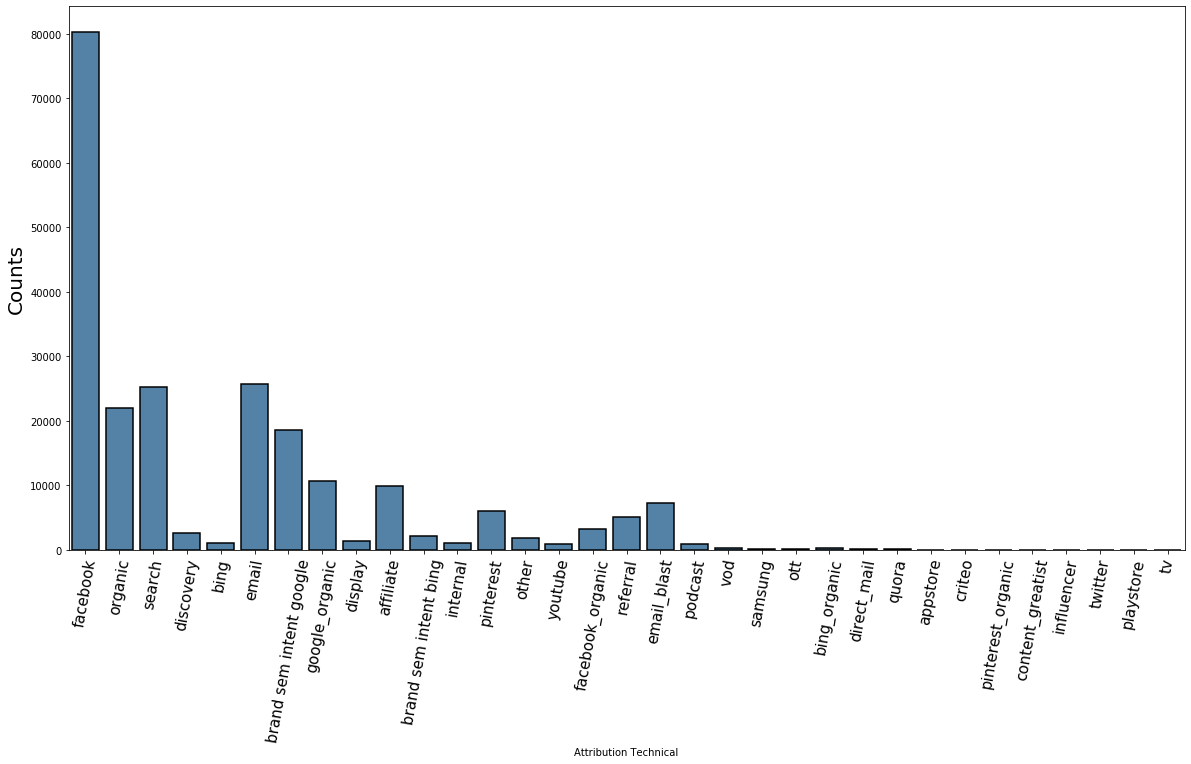

In [320]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x='attribution_technical', data=df,
                   palette = ['steelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=15, rotation=80)
#plt.yticks(fontsize=20)
plt.xlabel('Attribution Technical')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('num_weekly_services_utilized.png')

Text(0, 0.5, 'Subscribed')

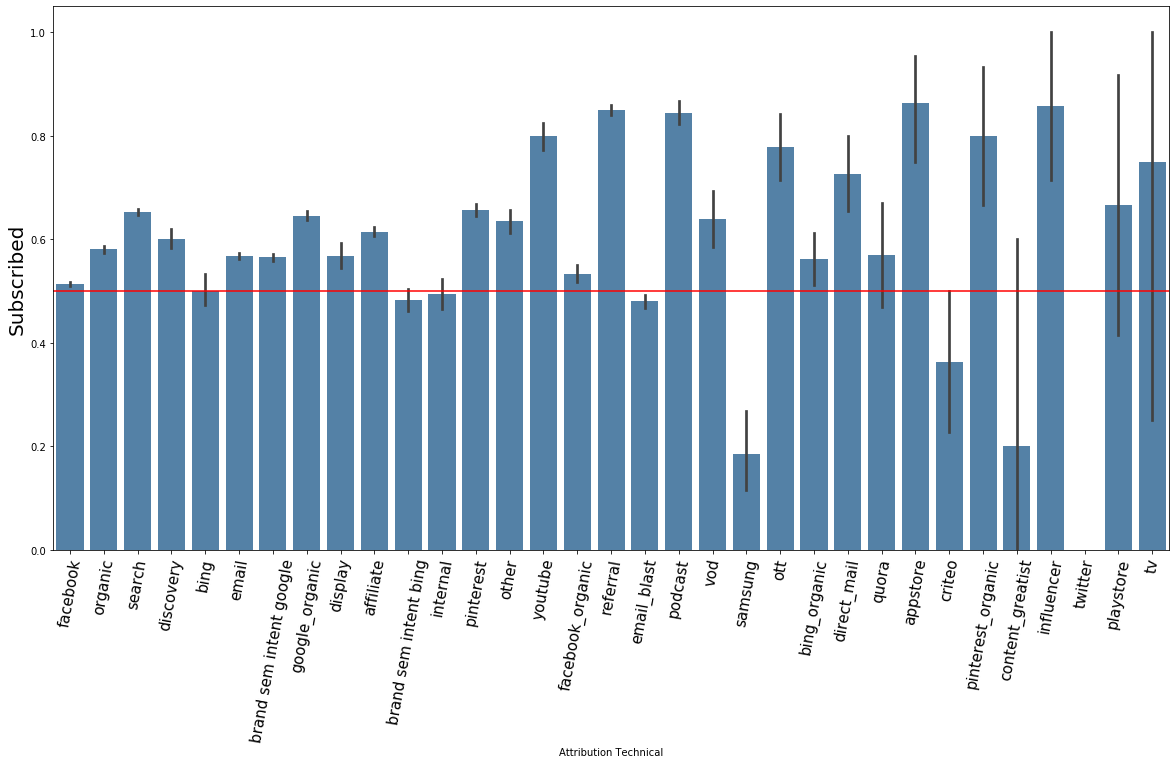

In [318]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'attribution_technical', y = 'current_sub_TF', data = df,
                 palette = ['steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=15, rotation=80)
#plt.yticks(fontsize=20)
plt.xlabel('Attribution Technical')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('preferred_genre.png')

### attribution_survey
customer reported "how did you hear about us", self-reported upon signup

In [321]:
#df['attribution_survey'].value_counts()

In [322]:
#attribution_survey_dict = dict(df['attribution_survey'].value_counts())
#plt.bar(attribution_survey_dict.keys(), attribution_survey_dict.values())
#plt.xticks(rotation=90)
#plt.show()

In [323]:
#attribution_survey_dict = dict(df['attribution_survey'].value_counts())
#plt.bar(attribution_survey_dict.keys(), np.log(list(attribution_survey_dict.values())))
#plt.xticks(rotation=90)
#plt.show()

Text(0, 0.5, 'Counts')

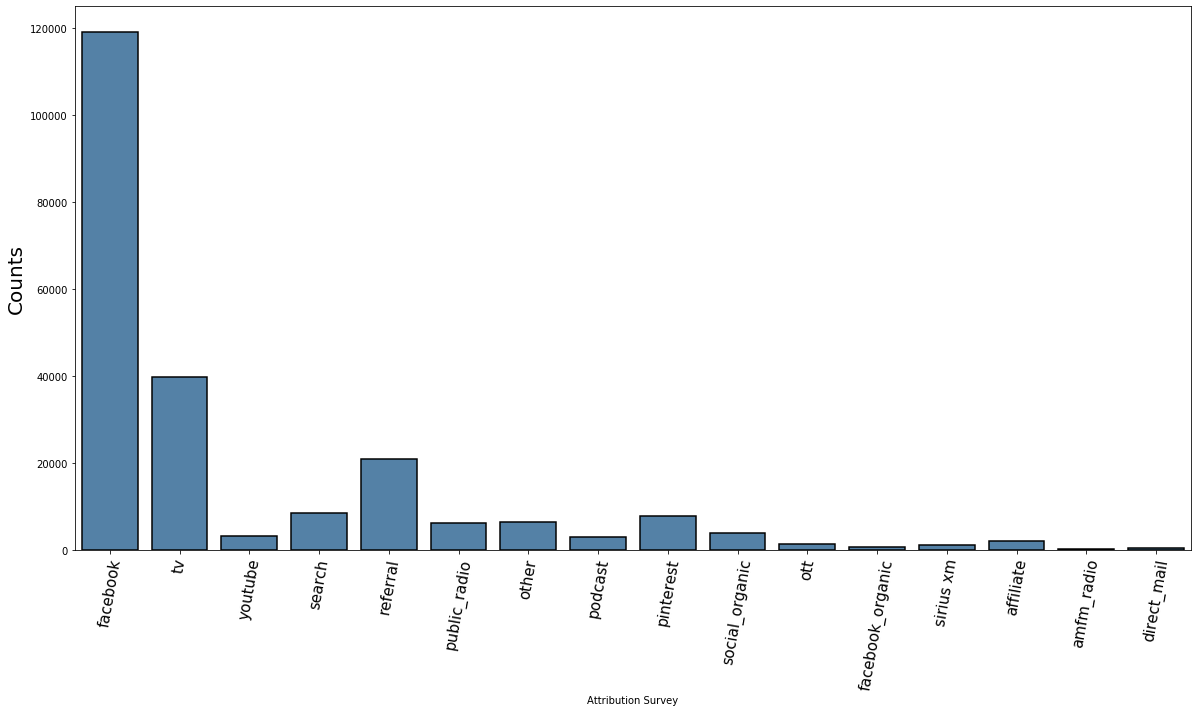

In [324]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x='attribution_survey', data=df,
                   palette = ['steelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=15, rotation=80)
#plt.yticks(fontsize=20)
plt.xlabel('Attribution Survey')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('num_weekly_services_utilized.png')

Text(0, 0.5, 'Subscribed')

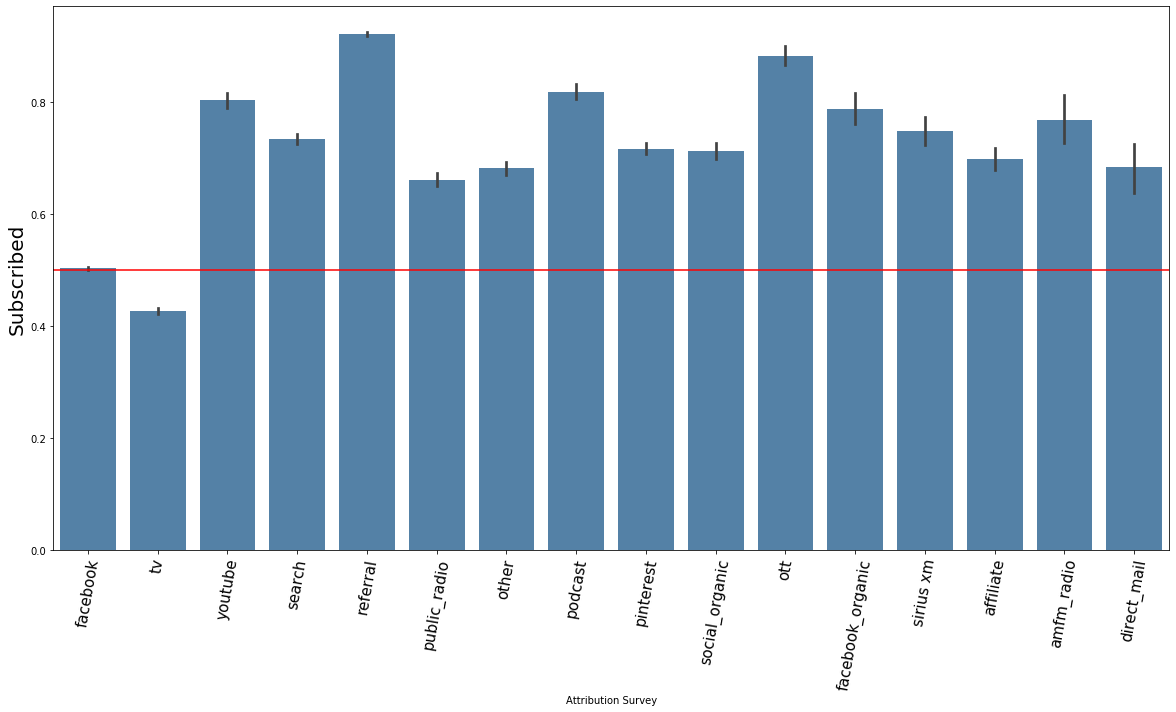

In [326]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'attribution_survey', y = 'current_sub_TF', data = df,
                 palette = ['steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=15, rotation=80)
#plt.yticks(fontsize=20)
plt.xlabel('Attribution Survey')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('preferred_genre.png')

### op_sys
operating system used for sign-up

In [56]:
df['op_sys'].value_counts()

iOS        143921
Android     70332
Name: op_sys, dtype: int64

In [327]:
#op_sys_dict = dict(df['op_sys'].value_counts())
#plt.bar(op_sys_dict.keys(), op_sys_dict.values())

Text(0, 0.5, 'Counts')

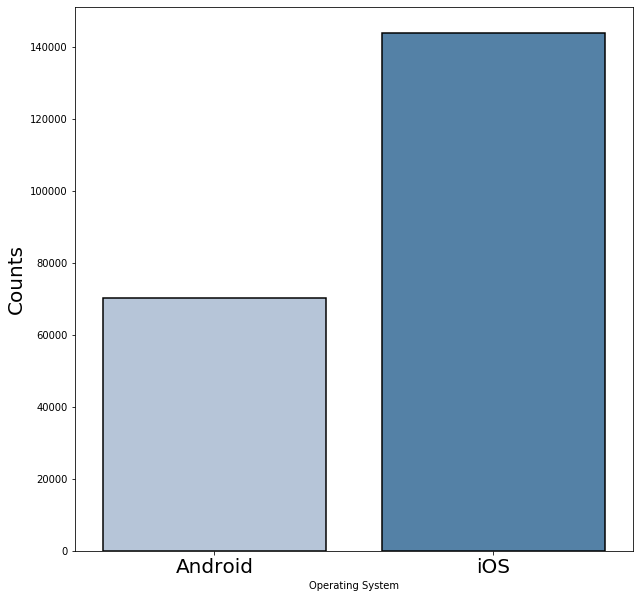

In [331]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x='op_sys', data=df,
                   palette = ['lightsteelblue', 'steelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Operating System')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('num_weekly_services_utilized.png')

Text(0, 0.5, 'Subscribed')

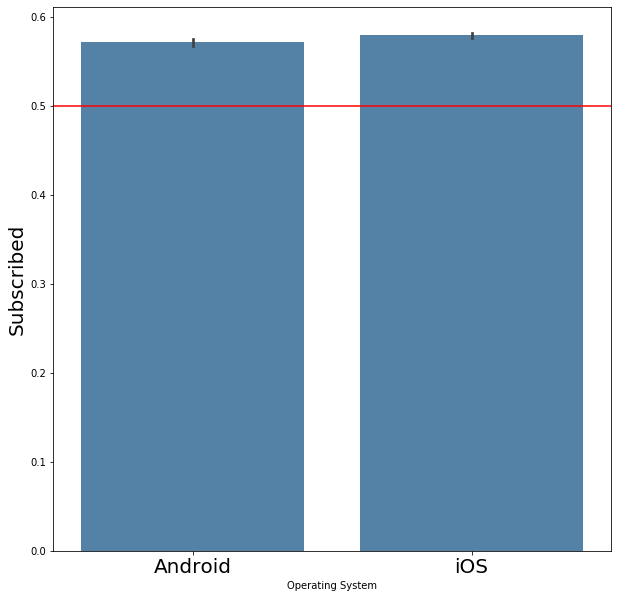

In [333]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'op_sys', y = 'current_sub_TF', data = df,
                 palette = ['steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Operating System')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('op_sys.png')

### months_per_bill_period
duration of billing cycle in months

In [58]:
df['months_per_bill_period'].value_counts()

4    227628
Name: months_per_bill_period, dtype: int64

**All users have 4 months_per_bill_period.**

### plan_type
pricing plan type, trial fee and duration

In [334]:
#df['plan_type'].value_counts()

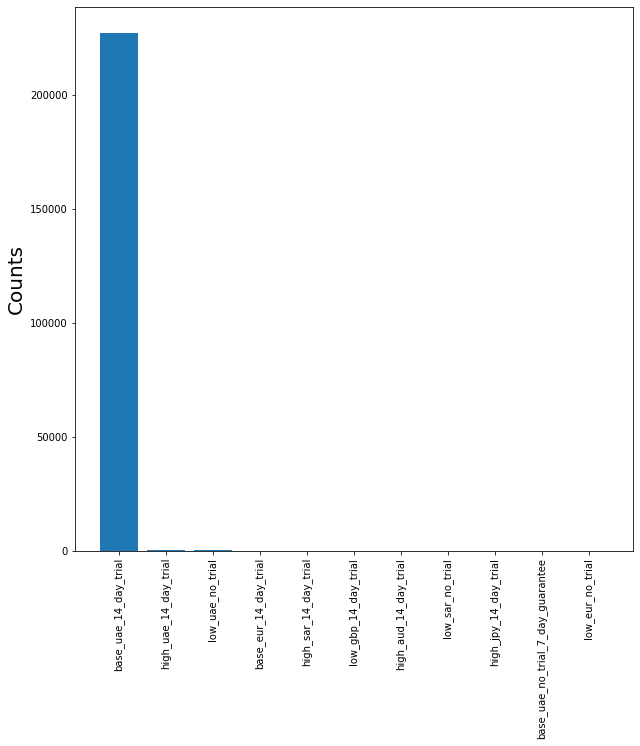

In [340]:
plt.figure(figsize = (10,10))
plan_type_dict = dict(df['plan_type'].value_counts())
plt.bar(plan_type_dict.keys(), plan_type_dict.values())
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=20)
plt.show()

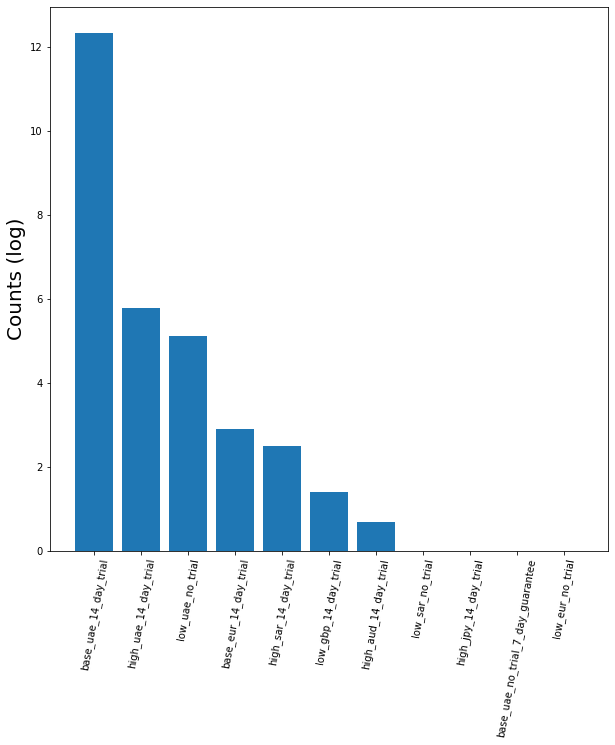

In [342]:
plt.figure(figsize = (10,10))
plan_type_dict = dict(df['plan_type'].value_counts())
plt.bar(plan_type_dict.keys(), np.log(list(plan_type_dict.values())))
plt.xticks(rotation=80)
plt.ylabel('Counts (log)', fontsize=20)
plt.show()

Text(0, 0.5, 'Subscribed')

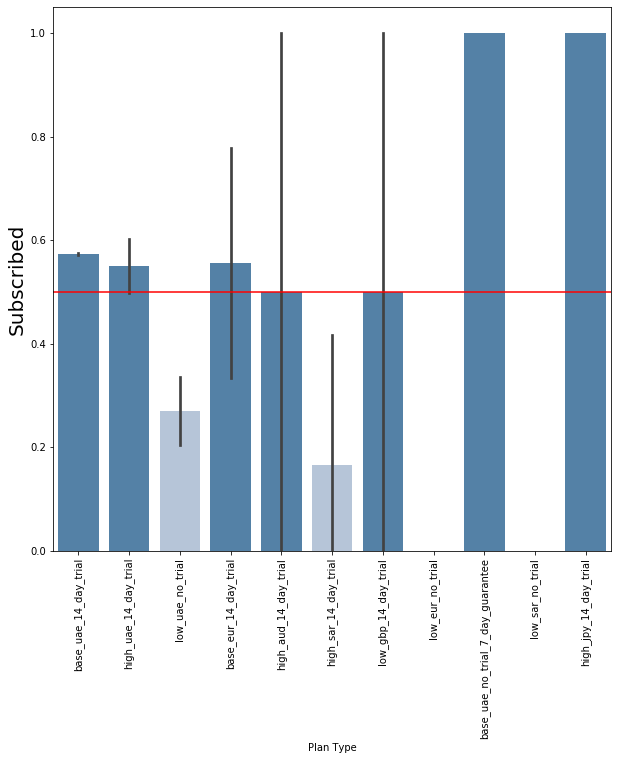

In [346]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'plan_type', y = 'current_sub_TF', data = df,
                 palette = ['steelblue', 'steelblue', 'lightsteelblue', 'steelblue', 'steelblue',
                            'lightsteelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=10, rotation=90)
#plt.yticks(fontsize=20)
plt.xlabel('Plan Type')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('op_sys.png')

### monthly_price

In [62]:
df['monthly_price'].value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

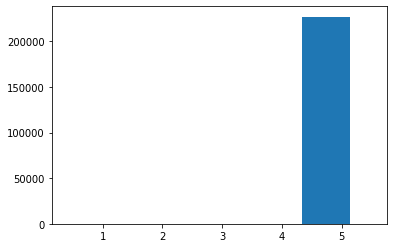

In [63]:
monthly_price_dict = dict(df['monthly_price'].value_counts())
plt.bar(monthly_price_dict.keys(), monthly_price_dict.values())
plt.show()

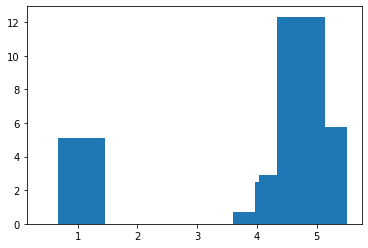

In [64]:
monthly_price_dict = dict(df['monthly_price'].value_counts())
plt.bar(monthly_price_dict.keys(), np.log(list(monthly_price_dict.values())))
plt.show()

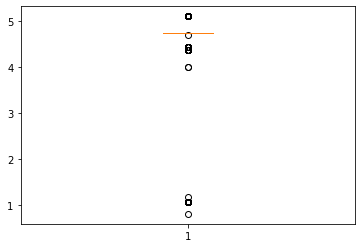

In [65]:
plt.boxplot(list(df['monthly_price'].dropna()))
plt.show()

What probaby happened was that someone ran an A/B test and stopped so we are seeing only a very small size of people using a lower price. Conlcusion is that we could potentially run A/B test on more sample data.

Another possible problem is that they are outliers???

In [66]:
(df['monthly_price']>4).value_counts()

True     227459
False       169
Name: monthly_price, dtype: int64

In [67]:
169/(169+227459)

0.0007424394187006871

Only 0.07% of the data has monthly price less than 4.

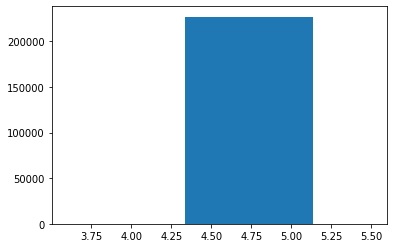

In [68]:
monthly_price_dict = dict(df[df['monthly_price']>4]['monthly_price'].value_counts())
plt.bar(monthly_price_dict.keys(), monthly_price_dict.values())
plt.show()

In [69]:
monthly_price_dict

{4.7343: 227101,
 5.101299999999998: 325,
 4.4407: 18,
 4.367299999999998: 12,
 4.0003: 2,
 4.6976: 1}

### discount_price
monthly quoted discounted price of subscription

In [70]:
df['discount_price'].value_counts()

4.5141    227096
5.0279       325
1.0276       167
4.2205        18
4.0737        12
4.3673         4
4.4407         2
3.7801         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

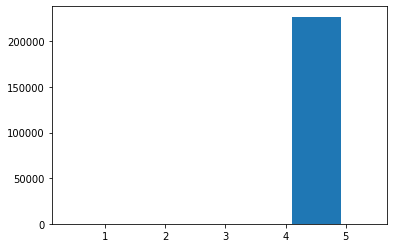

In [71]:
discount_price_dict = dict(df['discount_price'].value_counts())
plt.bar(discount_price_dict.keys(), discount_price_dict.values())
plt.show()

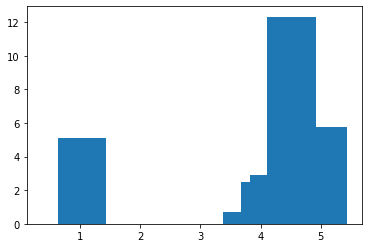

In [72]:
discount_price_dict = dict(df['discount_price'].value_counts())
plt.bar(discount_price_dict.keys(), np.log(list(discount_price_dict.values())))
plt.show()

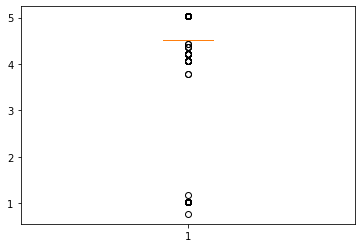

In [73]:
plt.boxplot(list(df['discount_price'].dropna()))
plt.show()

Monthly_price and discount_price has very similar distribution.

In [74]:
(df['discount_price']>4).value_counts()

True     227457
False       171
Name: discount_price, dtype: int64

In [75]:
171/(171+227457)

0.0007512256840107544

Only 0.07% of the data has monthly price less than 4.

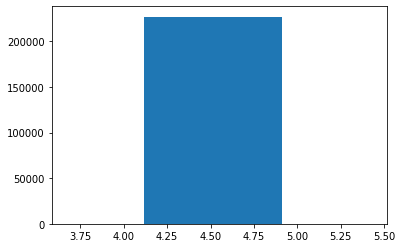

In [76]:
discount_price_dict = dict(df[df['discount_price']>4]['discount_price'].value_counts())
plt.bar(discount_price_dict.keys(), discount_price_dict.values())
plt.show()

In [77]:
discount_price_dict

{4.5141: 227096,
 5.027900000000002: 325,
 4.2205: 18,
 4.0737000000000005: 12,
 4.367299999999998: 4,
 4.4407: 2}

### account_creation_date
date of user sign-up for an account

In [78]:
df['account_creation_date'].value_counts()

2019-12-28 16:35:34    3
2020-02-29 17:58:30    3
2019-07-02 14:58:45    3
2019-11-17 16:24:52    3
2019-06-30 14:47:57    3
                      ..
2020-03-06 06:38:52    1
2019-08-22 18:43:59    1
2020-01-26 02:59:26    1
2019-08-12 20:34:51    1
2020-03-02 16:26:00    1
Name: account_creation_date, Length: 226023, dtype: int64

In [79]:
#account_creation_date_dict = dict(df['account_creation_date'].value_counts())
#plt.bar(account_creation_date_dict.keys(), account_creation_date_dict.values())

### trial_end_date
end date of subscriber trial period

In [80]:
df['trial_end_date'].value_counts()

2019-07-15 01:21:10    3
2020-03-14 17:58:30    3
2020-03-28 18:22:06    3
2020-01-11 16:35:34    3
2019-12-01 16:24:52    3
                      ..
2019-11-06 05:35:35    1
2019-12-24 14:18:25    1
2019-12-15 03:28:00    1
2020-01-20 11:44:49    1
2020-03-07 03:09:01    1
Name: trial_end_date, Length: 226023, dtype: int64

In [81]:
#trial_end_date_dict = dict(df['trial_end_date'].value_counts())
#plt.bar(trial_end_date_dict.keys(), trial_end_date_dict.values())

### initial_credit_card_declined
T/F first attempt at charging user was declined by credit card company

In [347]:
#df['initial_credit_card_declined'].value_counts()

In [348]:
#initial_credit_card_declined_dict = dict(df['initial_credit_card_declined'].value_counts())
#plt.bar(['False', 'True'], initial_credit_card_declined_dict.values())
#plt.title('Initial Credit Card Declined')

Text(0, 0.5, 'Counts')

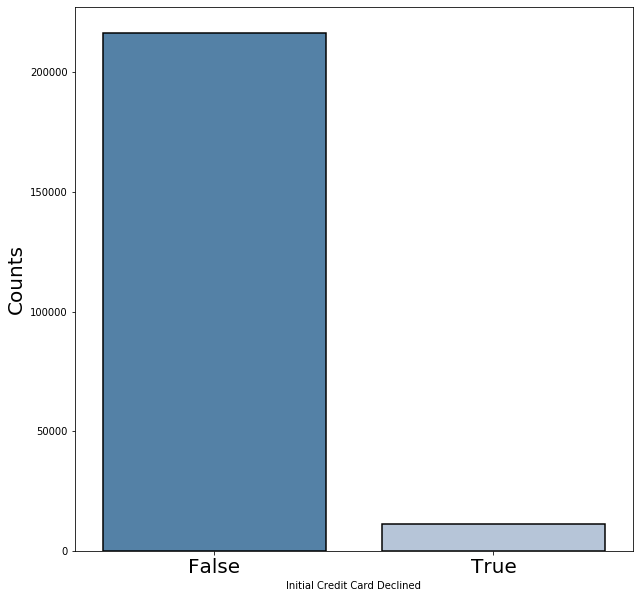

In [350]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x='initial_credit_card_declined', data=df,
                   palette = ['steelblue', 'lightsteelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel('Initial Credit Card Declined')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('num_weekly_services_utilized.png')

Text(0, 0.5, 'Subscribed')

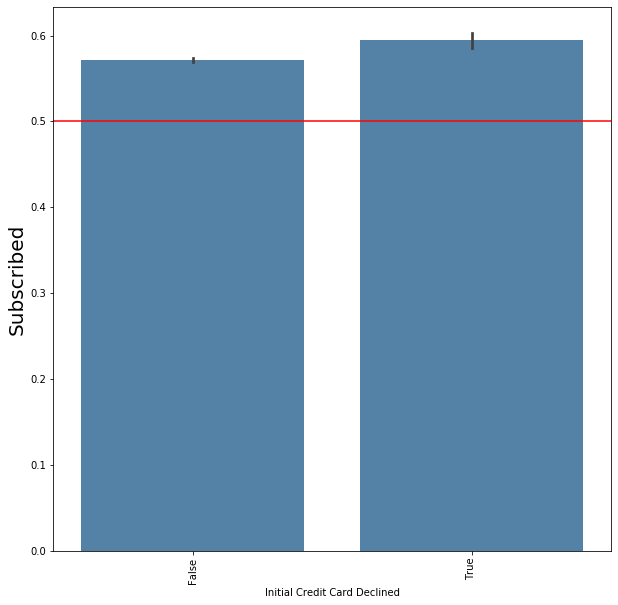

In [352]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'initial_credit_card_declined', y = 'current_sub_TF', data = df,
                 palette = ['steelblue', 'steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=10, rotation=90)
#plt.yticks(fontsize=20)
plt.xlabel('Initial Credit Card Declined')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('op_sys.png')

### join_fee
amount user paid to signup

In [359]:
#df['join_fee'].value_counts()

In [354]:
#join_fee_dict = dict(df['join_fee'].value_counts())
#plt.bar(join_fee_dict.keys(), join_fee_dict.values())
#plt.show()

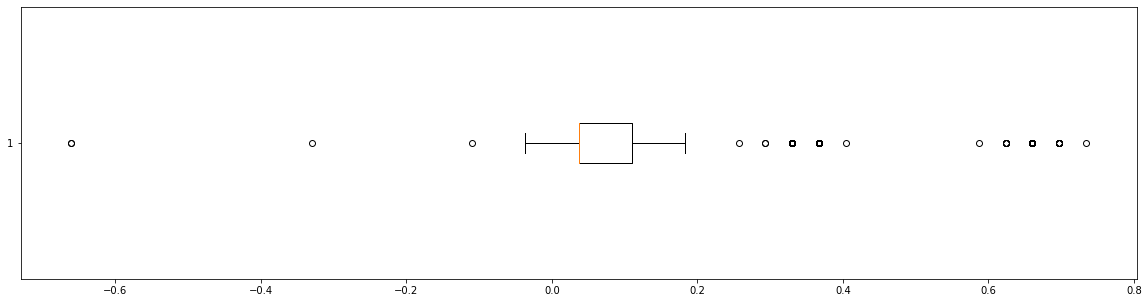

In [356]:
plt.figure(figsize=(20,5))
plt.boxplot(list(df['join_fee'].dropna()), vert=False)
plt.show()

In [87]:
(df['join_fee']>0).value_counts()

True     159229
False     68399
Name: join_fee, dtype: int64

In [357]:
68399/(68399+159229)

0.3004858804716467

### language
user preferred language, indicated in product settings

In [88]:
df['language'].value_counts()

ar    227628
Name: language, dtype: int64

Everyone speaks Arabic.

### payment_type
type of credit card

In [360]:
#df['payment_type'].value_counts()

In [361]:
#payment_type_dict = dict(df['payment_type'].value_counts())
#plt.bar(payment_type_dict.keys(), payment_type_dict.values())
#plt.xticks(rotation=90)
#plt.show()

Text(0, 0.5, 'Counts')

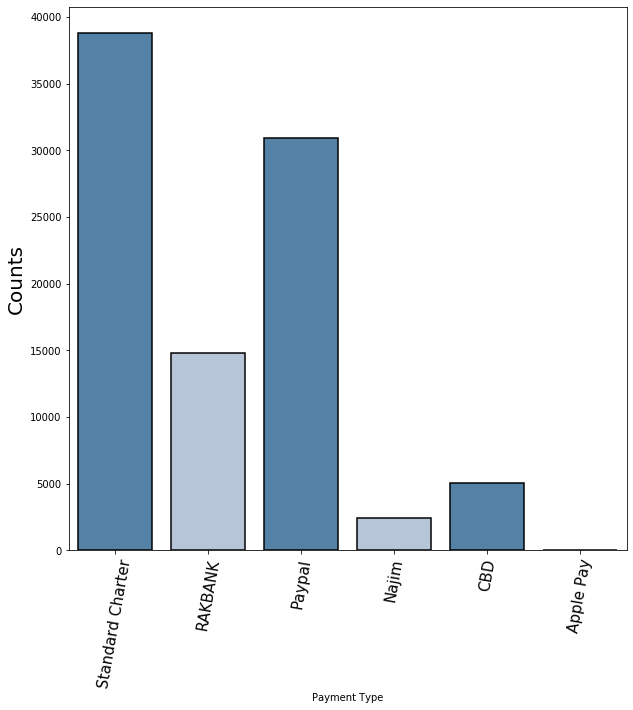

In [364]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x='payment_type', data=df,
                   palette = ['steelblue', 'lightsteelblue'], 
                   linewidth = 1.5, edgecolor = 'black')
plt.xticks(fontsize=15, rotation=80)
#plt.yticks(fontsize=20)
plt.xlabel('Payment Type')
plt.ylabel('Counts', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('num_weekly_services_utilized.png')

Text(0, 0.5, 'Subscribed')

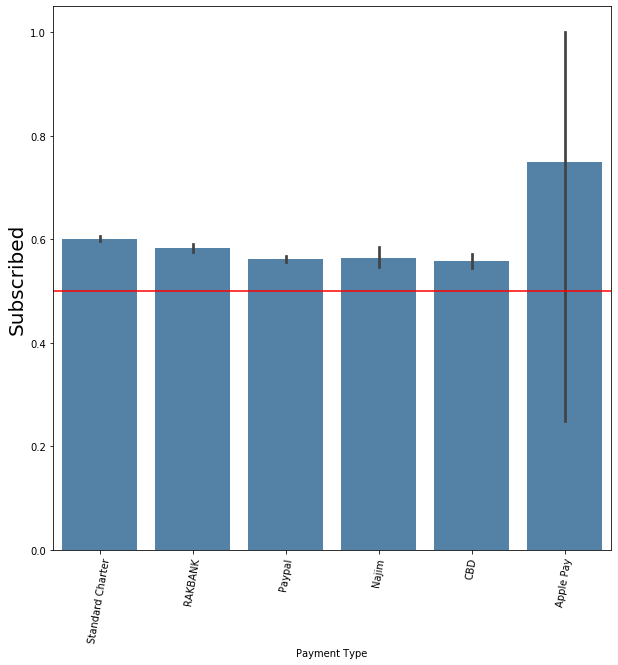

In [366]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'payment_type', y = 'current_sub_TF', data = df,
                 palette = ['steelblue', 'steelblue'])
                 #linewidth = 1.5, edgecolor = 'black')
plt.axhline(y=0.5, c='r')
plt.xticks(fontsize=10, rotation=80)
#plt.yticks(fontsize=20)
plt.xlabel('Payment Type')
plt.ylabel('Subscribed', fontsize=20)
#ax.set_xticklabels(['Tower', 'Bungalow', 'Plate+Tower', 'Plate'])
#plt.savefig('op_sys.png')

### num_trial_days
number of days in user's trial period

In [91]:
df['num_trial_days'].value_counts()

14    227458
0        170
Name: num_trial_days, dtype: int64

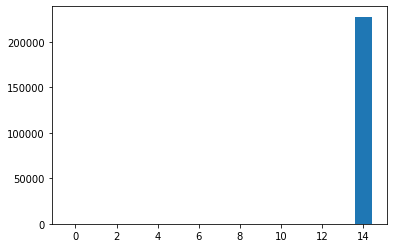

In [92]:
num_trial_days_dict = dict(df['num_trial_days'].value_counts())
plt.bar(num_trial_days_dict.keys(), num_trial_days_dict.values())
plt.show()

### current_sub_TF
user currently has access to content (tech flag)

In [93]:
df['current_sub_TF'].value_counts()

True     130250
False     97378
Name: current_sub_TF, dtype: int64

Text(0.5, 1.0, 'Curent Subscription')

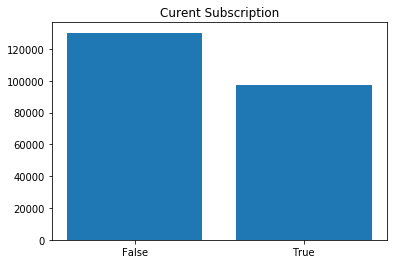

In [94]:
current_sub_TF_dict = dict(df['current_sub_TF'].value_counts())
plt.bar(['False', 'True'], current_sub_TF_dict.values())
plt.title('Curent Subscription')

### payment_period

In [95]:
df['payment_period'].value_counts()

0    95391
1    86968
2    42921
3     2348
Name: payment_period, dtype: int64

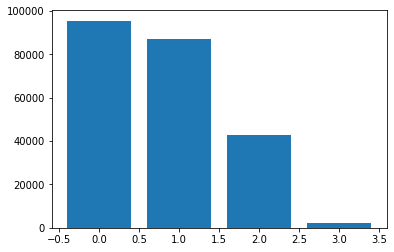

In [96]:
payment_period_dict = dict(df['payment_period'].value_counts())
plt.bar(payment_period_dict.keys(), payment_period_dict.values())
plt.show()

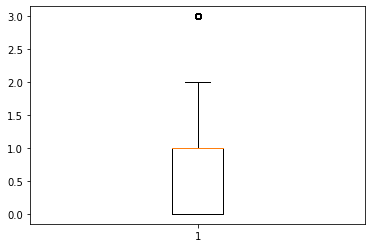

In [97]:
plt.boxplot(list(df['payment_period'].dropna()))
plt.show()

### last_payment

In [98]:
df['last_payment'].value_counts()

2020-02-29 12:16:18    3
2020-03-08 19:00:43    3
2019-12-14 02:48:10    3
2020-03-14 19:26:26    3
2019-12-15 02:54:00    2
                      ..
2020-03-25 18:50:23    1
2019-11-29 15:09:24    1
2020-01-28 00:08:51    1
2020-02-03 09:58:35    1
2020-03-07 03:09:01    1
Name: last_payment, Length: 131339, dtype: int64

### next_payment

In [99]:
df['next_payment'].value_counts()

2020-07-14 19:26:26    3
2020-07-08 19:00:43    3
2020-04-14 02:48:10    3
2020-03-28 18:22:06    3
2020-06-29 12:16:18    3
                      ..
2020-04-01 15:01:17    1
2020-03-30 13:16:16    1
2020-04-30 17:44:19    1
2020-04-26 19:03:03    1
2020-07-11 05:15:30    1
Name: next_payment, Length: 129206, dtype: int64

### cancel_date
date a user requested cancellation

In [100]:
df['cancel_date'].value_counts()

2019-07-13 00:00:00    431
2019-07-12 00:00:00    396
2019-07-14 00:00:00    384
2019-07-15 00:00:00    348
2019-07-11 00:00:00    321
                      ... 
2020-04-08 00:00:00     24
2020-04-06 00:00:00     22
2019-07-02 00:00:00     19
2020-04-09 00:00:00      6
2019-07-01 00:00:00      5
Name: cancel_date, Length: 284, dtype: int64

### trial_completed
user completed the trial period without canceling

In [101]:
df['trial_completed'].value_counts()

True     200236
False     27392
Name: trial_completed, dtype: int64

Text(0.5, 1.0, 'Trial Completed')

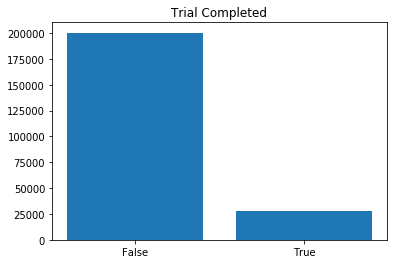

In [102]:
trial_completed_dict = dict(df['trial_completed'].value_counts())
plt.bar(['False', 'True'], trial_completed_dict.values())
plt.title('Trial Completed')